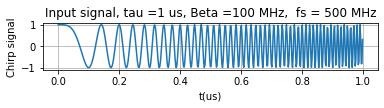

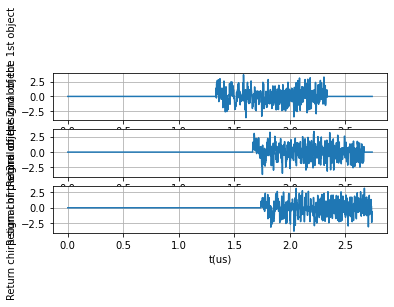

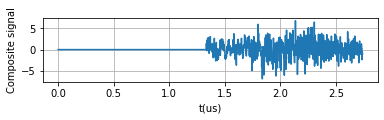

d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


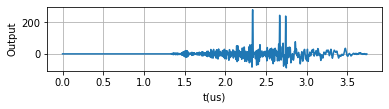

d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


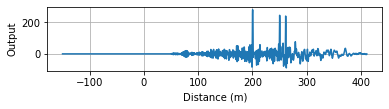

In [1]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.signal import*
from numpy.fft import fft, ifft

#Matched filter
def MatchedFilter(x, fs):
    #initialize
    hf = fft(x)
    h = ifft(hf.conj())
    out = np.convolve(h,x)
    return h, out

#Input
c = 3*np.power(10,8)
td = 1*10**-6
fs = 500*np.power(10,6)
f1 = 100*np.power(10,6)
t =  np.linspace(0,td-1/fs, np.round(int(td*fs))+1)
x = chirp(t,0,td, f1)


fil = MatchedFilter(x,fs)
h = fil[0]

#Objects
n_obj = 3
dr = np.zeros(n_obj)
dr[0] = 200
dr[1] = 250
dr[2] = 261
t_dr = dr*2/c
nmax_zeros = np.zeros(n_obj)
nmax_zeros = np.round(t_dr*fs)
nmax_x = np.ma.size(x)
sig_size = int(np.amax(nmax_zeros)+ nmax_x)
x_r = np.zeros((n_obj, sig_size))
nr_out = np.linspace(0, 1/fs*(sig_size-1), sig_size)
for it in range(0,n_obj):
    x_n = x + 1*np.random.randn(nmax_x)
    x_r[it,int(nmax_zeros[it]):int(nmax_zeros[it]+nmax_x)] = x_n
sig_com = np.sum(x_r, axis = 0)
out = np.convolve(h,sig_com)

plt.figure()
plt.subplot(411)
plt.plot(np.power(10,6)*t, x)
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Chirp signal')
plt.title('Input signal, tau =%d us, Beta =%d MHz,  fs = %d MHz' %(np.power(10,6)*td, 10**-6*f1, 10**-6*fs))
plt.show()

#Return signal
plt.subplot(412)
t_r = np.linspace(0,1/fs*(sig_size -1), sig_size)
plt.plot(np.power(10,6)*t_r, x_r[0, :])
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Return chirp signal of the 1st object')

#Return signal
plt.subplot(413)
plt.plot(np.power(10,6)*t_r, x_r[1,:])
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Return chirp signal of the 2nd object')

#Return signal
plt.subplot(414)
plt.plot(np.power(10,6)*t_r, x_r[2,:])
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Return chirp signal of the 3rd object')

plt.figure()
# Output
plt.subplot(311)
plt.plot(np.power(10,6)*t_r, sig_com)
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Composite signal')
plt.show()

# Output & delay
plt.subplot(312)
nmax_out = np.ma.size(out)
n_out = np.linspace(0, 1/fs*(nmax_out-1), nmax_out)
plt.plot(np.power(10,6)*n_out, out)
plt.grid(True)
plt.xlabel('t(us)')
plt.ylabel('Output')
plt.show()

# Output & distance
plt.subplot(313)
nmax_out = np.ma.size(out)
n_out = np.linspace(0, 1/fs*(nmax_out-1), nmax_out)
dist = (n_out - td)*c/2
plt.plot(dist, out)
plt.grid(True)
plt.xlabel('Distance (m)')
plt.ylabel('Output')
plt.show()